# ¡Hola, James!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

El primer paso para trabajar con datos es acceder a ellos, una vez visualizados nos encontramos con que no se ajustan al formato estándar, debido a que los mismos estan delimitados con el caracter ';', lo que nos indica que debemos hacer uso del parametro sep= , estableciendo el argumento correcto para cada uno de los archivos de datos.

De igual forma se verifican que cada uno de los tipos de datos, asegurandonos que estos sean leidos por pandas de la forma correcta.


In [1]:
import pandas as pd # importar librerías
import matplotlib.pyplot as plt

In [2]:
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv' , sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo con esta importación de datos y de librerías.
</div>

In [3]:
display(df_orders.head())# mostrar información del DataFrame
df_orders.info()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
display(df_products.head())# mostrar información del DataFrame
df_products.info()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
display(df_aisles.head())# mostrar información del DataFrame
df_aisles.info()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
display(df_departments.head())# mostrar información del DataFrame
df_departments.info()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
display(df_order_products.head())# mostrar información del DataFrame
df_order_products.info()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

R= Para la correcta lectura de los datos se ajusto el parámetro correspondiente, una vez visualizado cada uno de los data frames con los cuales vamos a trabajar se hace indispensable el procesamiento de los mismos, pues varios de ellos poseen datos ausentes que puedisen alterar de forma negativa los resultados obtenidos durante el estudio posterior.



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Has hecho bien con esta exploración inicial de datos.
</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Se realizará verificacion de datos con el comando (dtypes) para cada uno de los dataframes facilitados, corrigiendo aquellas columnas cuyo tipo de datos no corresponda.

Uno de los pasos mas importantes para el procesamiento de datos es la identificación de valores duplicados, para este paso usaré el metodo .duplicated() combinado con .sum(), con la finalidad de obtener el numero total de valores duplicados en cada uno de los data frames en estudio.

Una vez identificados procederemos al estudio detallado de los datos duplicados para evaluar su posible eliminación, siempre y cuando este proceso no comprometa el resultado final de nuestro estudio.





## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
display(f'cantidad de pedidos duplicados:{df_orders.duplicated().sum()}')

'cantidad de pedidos duplicados:15'

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

R: todos los datos duplicados dentro del dataframe en estudio se realizaron el día miércoles a la misma hora (2:00:00).

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_orders[(df_orders.order_dow == 3) & (df_orders.order_hour_of_day == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

R= La totalidad de los pedidos presentes en el dataframe fueron realizados el dia miércoles a las 2:00:00 am

In [10]:
# Elimina los pedidos duplicados
df_orders= df_orders.drop_duplicates().reset_index(drop=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
df_orders.duplicated().sum()

0

In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
df_orders.duplicated(subset='order_id').sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos

R= Analizando los datos del dataframe (data_orders) nos encontramos con un conjuntos de valores duplicados, lo que influye directamente en el resultado que vayamos a obtener de nuestro análisis, por lo que proceden a ser eliminados con el método .drop_duplicates.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo en esta sección.
</div>

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
df_products.duplicated().sum()

0

In [14]:
# Verifica únicamente si hay IDs duplicadas de productos
df_products.duplicated(subset='product_id').sum()

0

In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name']= df_products['product_name'].str.upper()
print(f'Cantidad de nombres de productos duplicados: {df_products.duplicated(subset = "product_name").sum()}')
df_products[df_products.duplicated(subset = 'product_name')]


Cantidad de nombres de productos duplicados: 1361


,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products[~(df_products['product_name'].isna()) & (df_products['product_name'].duplicated())]

,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos.

R: Al revisar el dataframe nos encontramos con que no existen filas totalmente duplicadas, aun asi se verifican por separado las columnas de 'product_id' y "product_name" (cambiando a mayusculas todo el contenido de esa columna para comparar de manera más efectiva), si bien en la columna de 'product_id' no se encontraron valores duplicados, si se encontraron en la columna de nombres de productos, sin embargo es de esperarse pues es posible que distintos usuarios pidan el mismo producto.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Has identificado a los duplicados correctamente.
</div>


### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
df_departments[df_departments.duplicated()]

,department_id,department


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
df_departments[df_departments.duplicated(subset = 'department_id')]


,department_id,department


Describe brevemente tus hallazgos y lo que hiciste con ellos.

R= No se encuentran datos duplicados en el data frame en estudio, estan registrados 21 departamentos, correspondientes a las categorias de cada producto disponible para la venta.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
df_aisles[df_aisles.duplicated()]

,aisle_id,aisle


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
df_aisles[df_aisles.duplicated(subset='aisle_id')]

,aisle_id,aisle


Describe brevemente tus hallazgos y lo que hiciste con ellos.

R= No se encuentran datos duplicados en el data frame en estudio, los datos corresponden a los pasillos de cada uno de los productos disponibles para la venta

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
df_order_products[df_order_products.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_order_products[df_order_products.duplicated(subset=["order_id", "product_id"])]


,order_id,product_id,add_to_cart_order,reordered


Describe brevemente tus hallazgos y lo que hiciste con ellos.

R= No se encuentran datos duplicados en el data frame en estudio. por lo que los datos en el dataframe no sufren cambio alguno.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Buen trabajo en esta sección!
</div>

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
df_products[df_products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

R= Una vez aplicado el metodo para determinar la cantidad de valores ausentes, nos encontramos con que existen 1258 valores ausentes en la columna 'product_name' de nuestro data frame en estudio.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
df_products[(df_products['product_name'].isna()) & (df_products['aisle_id'] == 100)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

R= Todos los productos cuto nombre esta ausente estan relacionados con el pasillo 100

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
df_products[(df_products['product_name'].isna()) & (df_products['department_id'] == 21)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

R= Al mostrar los valores ausentes dentro de nuestro data frame, notamos que el total de estos poseen el mismo número de pasillo y departamento, Lo que podría indicar que los productos ubicados en el pasillo 100 y departamento 21 no están identificados en el sistema.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
display(df_departments[df_departments['department_id'] == 21]['department'])
display(df_aisles[df_aisles['aisle_id'] == 100]['aisle'])

20    missing
Name: department, dtype: object

99    missing
Name: aisle, dtype: object

Describe brevemente cuáles son tus hallazgos.

R= Se han encontrado 20 palabras en department y 99 palabras en aisle.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'] = df_products["product_name"].fillna("Unknown")
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

R= Una vez identificadas todas las filas donde el nombre de los productos se encuentran ausentes, debido a que no hay forma de averiguar que producto fue entregado y tampoco podemos rellenar manualmente los valores ausentes con datos significativos, estos fueron rellenados con la palabra 'Unknown' como defecto para representar los datos ausentes. 

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
display(df_orders.isna().sum())


order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
df_orders[(df_orders['days_since_prior_order'].isna()) & (df_orders['order_number'] != 1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Describe brevemente tus hallazgos y lo que hiciste con ellos.

R= Los resultados de la busqueda de datos ausentes en el data frame arrojan que los datos ausentes se encuentran solo en la columna de 'dias transcurridos desde que el cliente hizo su última compra', lo que es totalmente lógico debido a que corresponden a la primera compra del cliente.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
df_order_products[df_order_products['add_to_cart_order'].isna()]


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(f'El valor mínimo es: {df_order_products["add_to_cart_order"].min()}')
print(f'El valor máximo es: {df_order_products["add_to_cart_order"].max()}')

El valor mínimo es: 1.0
El valor máximo es: 64.0


Describe brevemente cuáles son tus hallazgos.

R= Una vez obtenidos los resultados de los productos ausentes en el data frame en estudio, determinando su mínimo y máximo en el número secuencial en en que fueron agregados los artículos en el carro de compras, podriamos decir que exíste un valor mínimo de 1 y un máximo de 64.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_order_id = sorted(list(df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'].unique()))

In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
orders_group = df_order_products[df_order_products['order_id'].isin(missing_order_id)].groupby('order_id')
orders_group['product_id'].count().min()

65

Describe brevemente cuáles son tus hallazgos.

R= Según los datos obtenidos los pedidos con valores ausentes tienen un minimo de 65 productos.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999).astype('int')
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

R= Se rellenan los valores ausentes en el data frame y se convierte la columna 'add_to_cart_order' a tipo entero.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Perfecto! Gran trabajo en esta sección.
</div>

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

R= Antes de realizar el analisis de datos es de suma importancia el debido procesamiento de los mismos para de esta forma garantizar que los resultados obtenidos contengan información fiel a la realidad.

Esta tarea de limpieza de datos fue reaizada con exito durante el paso 2 de nuestro proyecto, ahora tenemos datos listos para su analisis en el siguiente paso.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print(df_orders['order_hour_of_day'].unique())

[13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]


In [36]:
print(df_orders['order_dow'].unique())

[6 5 0 4 3 1 2]


Escribe aquí tus conclusiones

R= Una vez aplicado el metodo unique(), podemos corroborar que los datos presentes en las columnas de "order_hour_of_day" correspondiente a las horas del día y la columna "order_dow" correspondiente a los días de la semana, son correctas.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

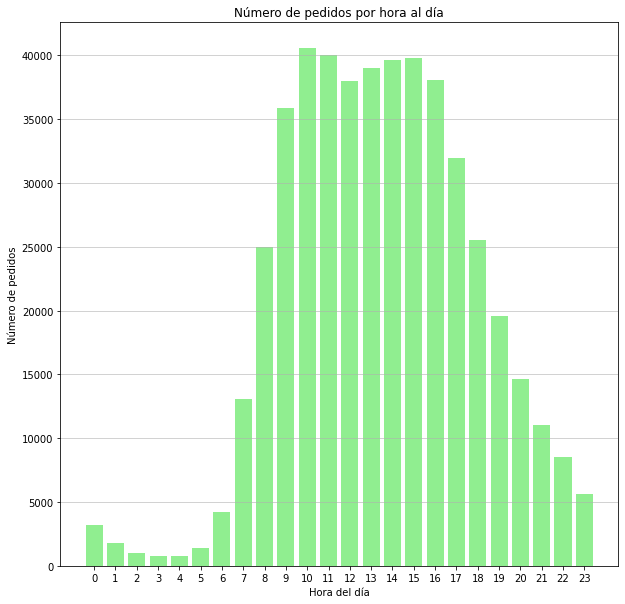

In [37]:
orders_by_hour = df_orders['order_hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(10, 10))
plt.bar(orders_by_hour.index, orders_by_hour.values, color='lightgreen')
plt.title('Número de pedidos por hora al día')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones

R= El gráfico anterior muestra las ordenes realizadas en las diferentes horas, si bien se muestra actividad durante todo el día,  se podria decir que a las 10:00 am es la hora en que los usuarios realizan la mayor cantidad de ordenes en la plataforma, quizas se deba a que es la hora donde la mayoría de las personas toman almuerzo. 

### [A3] ¿Qué día de la semana compran víveres las personas?

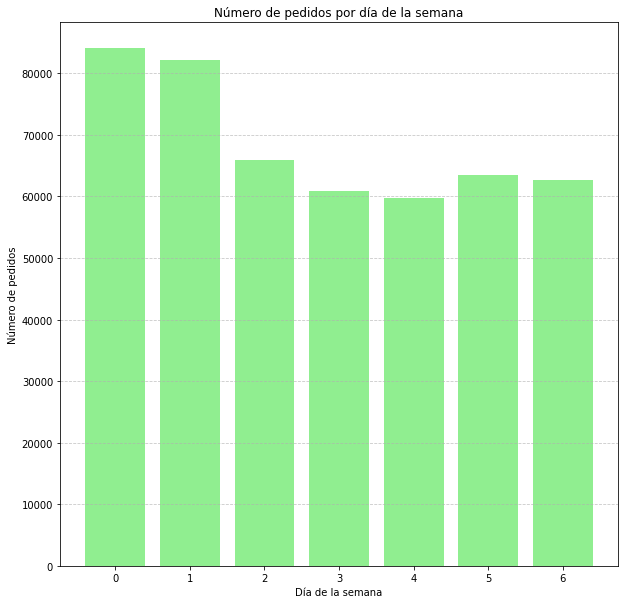

In [38]:
orders_by_day = df_orders['order_dow'].value_counts().sort_index()
day_of_week = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}
plt.figure(figsize=(10,10))
plt.bar(orders_by_day.index, orders_by_day.values, color='lightgreen')
orders_by_day.index = orders_by_day.index.map(day_of_week)
plt.title('Número de pedidos por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de pedidos')
plt.grid(axis='y', linestyle='--', alpha=0.7)

Escribe aquí tus conclusiones

R= El fin de semana (sábado y domingo) son los dias de mayor actividad de órdenes en la semana.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

Valor mínimo de días entre pedidos: 0.0
Valor máximo de días entre pedidos: 30.0


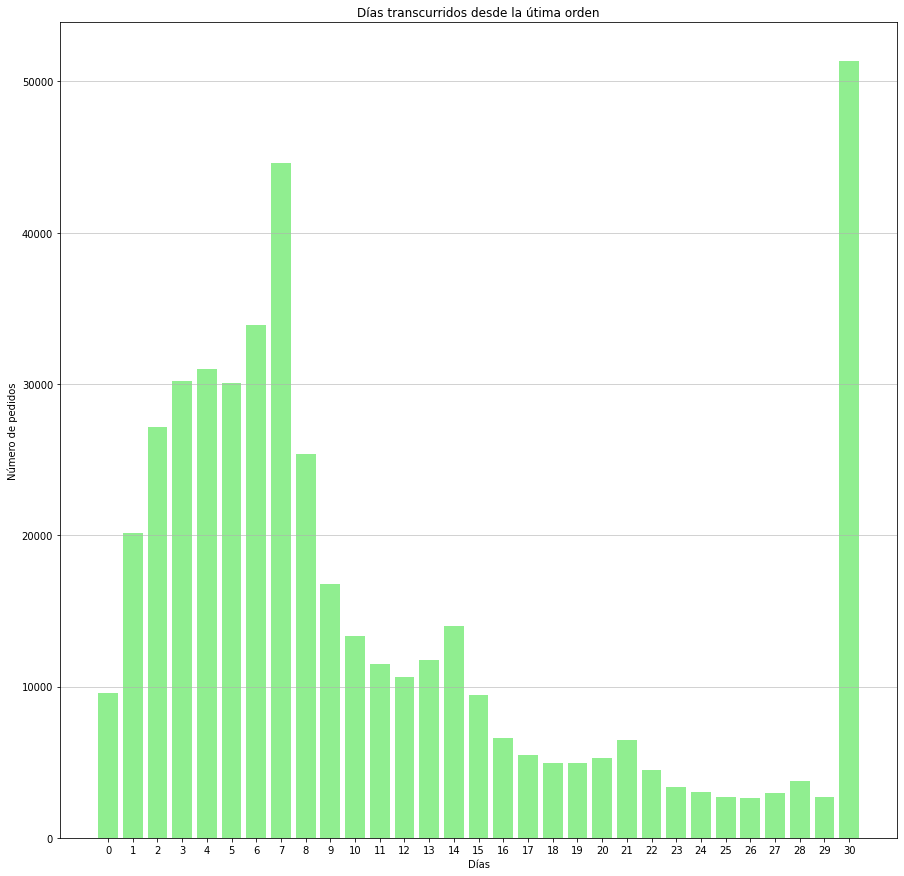

In [39]:
min_days_since_order = df_orders['days_since_prior_order'].min()
max_days_since_order = df_orders['days_since_prior_order'].max()


print("Valor mínimo de días entre pedidos:", min_days_since_order)
print("Valor máximo de días entre pedidos:", max_days_since_order)

days_since_order = df_orders['days_since_prior_order'].value_counts().sort_index()
plt.figure(figsize=(15,15))
plt.bar(days_since_order.index, days_since_order.values, color='lightgreen')
plt.title('Días transcurridos desde la útima orden')
plt.xlabel('Días')
plt.ylabel('Número de pedidos')
plt.xticks(range(31))
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones

R= Segun los datos obtenidos en el gráfico mayoria de los clientes realizan compras con una frecuencia semanal (7 dias) y mensual (30 dias) en la plataforma.

El valor de espera entre los clientes tiene un minimo de 0 días y un maximo de 30 días.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo en esta sección `A`.
</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
dist_wed = df_orders[df_orders['order_dow'] ==3]['order_hour_of_day'].value_counts().sort_index()
dist_sat = df_orders[df_orders['order_dow'] ==6]['order_hour_of_day'].value_counts().sort_index()

In [41]:
dist = pd.concat([dist_wed, dist_sat], axis=1)
dist.columns = ['dist_wed', 'dist_sat']
print(dist.head())

   dist_wed  dist_sat
0       373       464
1       215       254
2       106       177
3       101       125
4       108       118


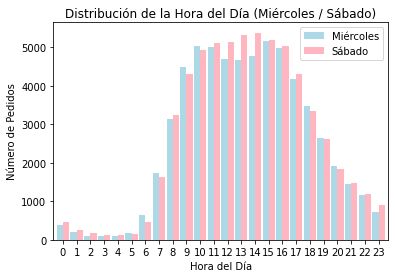

In [42]:
dist.plot(kind='bar', width=0.9, color=['lightblue', 'lightpink'])
plt.title('Distribución de la Hora del Día (Miércoles / Sábado)')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=0)
plt.legend(['Miércoles', 'Sábado'])
plt.show()

Escribe aquí tus conclusiones

R= Al comprarar la distribución del dia miércoles y sábado, podemos notar que el dia sabado posee una mayor actividad en comparación con el miércoles.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [43]:
display(df_orders.groupby('order_number')['user_id'].count())

order_number
1      28817
2      28633
3      28685
4      28703
5      25661
       ...  
96       220
97       221
98       191
99       169
100      194
Name: user_id, Length: 100, dtype: int64

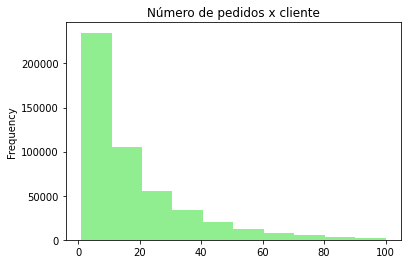

In [44]:
df_orders['order_number'].plot(kind= "hist",
                      ylabel= "Frecuencia",
                      color='lightgreen',
                      title= "Número de pedidos x cliente")

plt.show()

Escribe aquí tus conclusiones

R= La distribución nos indica que los usuarios realizan menos numeros de pedidos con mayor frecuencia, esto puede tener un origen en una insatisfacción en el proceso de compra, pues los clientes compran pocas veces en la plataforma.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [45]:
product_count = df_order_products['product_id'].value_counts()
print(product_count)

24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
         ...  
10543        1
5222         1
2347         1
11893        1
32074        1
Name: product_id, Length: 45573, dtype: int64


In [46]:
popular_products_count = product_count.head(20)
print(popular_products_count)


24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: product_id, dtype: int64


In [47]:
popular_products_id = popular_products_count.index.tolist()
print(popular_products_id)

[24852, 13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209, 27845, 27966, 22935, 24964, 45007, 39275, 49683, 28204, 5876, 8277, 40706]


In [48]:
popular_products_name = df_products.query('product_id in @popular_products_id')
print(popular_products_name[['product_id', 'product_name']])

       product_id              product_name
5875         5876             ORGANIC LEMON
8276         8277  APPLE HONEYCRISP ORGANIC
13175       13176    BAG OF ORGANIC BANANAS
16796       16797              STRAWBERRIES
21136       21137      ORGANIC STRAWBERRIES
21902       21903      ORGANIC BABY SPINACH
22934       22935      ORGANIC YELLOW ONION
24851       24852                    BANANA
24963       24964            ORGANIC GARLIC
26208       26209                     LIMES
27844       27845        ORGANIC WHOLE MILK
27965       27966       ORGANIC RASPBERRIES
28203       28204        ORGANIC FUJI APPLE
39274       39275       ORGANIC BLUEBERRIES
40705       40706    ORGANIC GRAPE TOMATOES
45006       45007          ORGANIC ZUCCHINI
47208       47209      ORGANIC HASS AVOCADO
47625       47626               LARGE LEMON
47765       47766           ORGANIC AVOCADO
49682       49683            CUCUMBER KIRBY


Escribe aquí tus conclusiones

R= Al parecer los productos organicos son los que reciben mayor atención de los usuarios en la plataforma.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [49]:
products_per_order = df_order_products['order_id'].value_counts().mean()
print(f'Pedido promedio por cliente: {products_per_order} artículos')

Pedido promedio por cliente: 10.098983215049127 artículos


In [50]:
products_dist = df_order_products['order_id'].value_counts()
print(products_dist)

61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
54659        1
210431       1
1717983      1
1136563      1
8196         1
Name: order_id, Length: 450046, dtype: int64


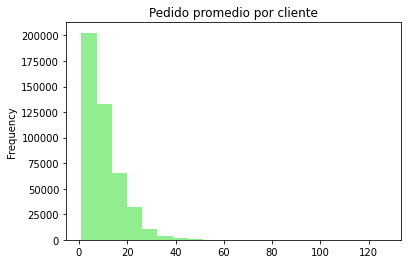

In [51]:
products_dist.plot(kind= "hist",
                      color='lightgreen',
                      title= "Pedido promedio por cliente",
                      bins=20,)

plt.show()

Escribe aquí tus conclusiones

R= El gráfico muestra que la cantidad de productos por compra dentro de la plataforma, al parecer son pocos los clientes que realizan compras con una gran cantidad de articulos, pues el promedio de articulos por compra es de 10 unidades.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [52]:
product_reorder = df_order_products.query('reordered == 1')
print(product_reorder)

         order_id  product_id  add_to_cart_order  reordered
1          567889        1560                  1          1
2         2261212       26683                  1          1
3          491251        8670                 35          1
4         2571142        1940                  5          1
5         2456893       21616                  4          1
...           ...         ...                ...        ...
4544999   1622300       24852                  1          1
4545000   1125324       40600                  6          1
4545002    577211       15290                 12          1
4545004    692640       47766                  4          1
4545005    319435         691                  8          1

[2683838 rows x 4 columns]


In [53]:
product_id_reorder_all = product_reorder.groupby('product_id')['reordered'].count()
product_id_reorder = product_id_reorder_all.sort_values(ascending = False)
product_id_reorder = product_id_reorder.head(20)
print(product_id_reorder)

product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: reordered, dtype: int64


In [54]:
popular_products_id_reorder = product_id_reorder.index.tolist()
print(popular_products_id_reorder)

[24852, 13176, 21137, 21903, 47209, 47766, 27845, 47626, 27966, 16797, 26209, 22935, 24964, 45007, 49683, 28204, 8277, 39275, 5876, 49235]


In [55]:
popular_products_reorder = df_products.query('product_id in @popular_products_id_reorder')
print(popular_products_reorder[['product_id', 'product_name']])

       product_id              product_name
5875         5876             ORGANIC LEMON
8276         8277  APPLE HONEYCRISP ORGANIC
13175       13176    BAG OF ORGANIC BANANAS
16796       16797              STRAWBERRIES
21136       21137      ORGANIC STRAWBERRIES
21902       21903      ORGANIC BABY SPINACH
22934       22935      ORGANIC YELLOW ONION
24851       24852                    BANANA
24963       24964            ORGANIC GARLIC
26208       26209                     LIMES
27844       27845        ORGANIC WHOLE MILK
27965       27966       ORGANIC RASPBERRIES
28203       28204        ORGANIC FUJI APPLE
39274       39275       ORGANIC BLUEBERRIES
45006       45007          ORGANIC ZUCCHINI
47208       47209      ORGANIC HASS AVOCADO
47625       47626               LARGE LEMON
47765       47766           ORGANIC AVOCADO
49234       49235       ORGANIC HALF & HALF
49682       49683            CUCUMBER KIRBY


Escribe aquí tus conclusiones

R= Al parecer los usuarios de la aplicación son fanáticos de los productos organicos, pues estos se posicionan entre los pedidos con mayor frecuencia.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [56]:
promedio_reordered = df_order_products.groupby('product_id')['reordered'].mean()
print(promedio_reordered)

product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: reordered, Length: 45573, dtype: float64


Escribe aquí tus conclusiones

R= Hay productos dentro de la plataforma que incluso no se reordenan, sin embargo hay otros productos que poseen mayor popularidad entre los compradores.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [57]:
merge_tables  = df_orders.merge(df_order_products, on = 'order_id', how = 'left')
print(merge_tables)

         order_id  user_id  order_number  order_dow  order_hour_of_day  \
0         1515936   183418            11          6                 13   
1         1515936   183418            11          6                 13   
2         1515936   183418            11          6                 13   
3         1515936   183418            11          6                 13   
4         1515936   183418            11          6                 13   
...           ...      ...           ...        ...                ...   
4573908   2071924     1730            18          1                 14   
4573909   2071924     1730            18          1                 14   
4573910   2071924     1730            18          1                 14   
4573911   2071924     1730            18          1                 14   
4573912   2071924     1730            18          1                 14   

         days_since_prior_order  product_id  add_to_cart_order  reordered  
0                          30.0    

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 157437, dtype: float64


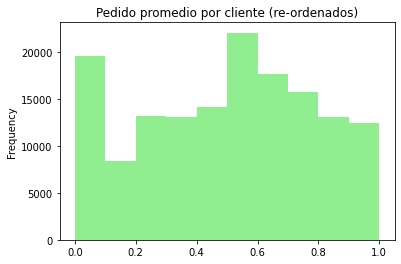

In [58]:
mean_reordered_per_client = merge_tables.groupby('user_id')['reordered'].mean()
print(mean_reordered_per_client)


mean_reordered_per_client.plot(kind= "hist",
                      color='lightgreen',
                      title= "Pedido promedio por cliente (re-ordenados)",
                      bins=10,)

plt.show()

Escribe aquí tus conclusiones

R= Podemos observar que muchos clientes (abajo de 20,000 clientes) no reordenan un producto, pero tambien muchos otros clientes (arriba de 20,000) reordenan en un (50-60% de probabilidad) que metan nuevamente en su carrito de compras un producto que ya habían pedido anteriormente

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [59]:
first_to_added = df_order_products.query('add_to_cart_order ==1')
print(first_to_added)

         order_id  product_id  add_to_cart_order  reordered
1          567889        1560                  1          1
2         2261212       26683                  1          1
14        1961225       37553                  1          1
16         639939       10017                  1          1
23         750040        8518                  1          0
...           ...         ...                ...        ...
4544978   1759009       46175                  1          0
4544989    115427       20842                  1          1
4544990   2049780       28576                  1          1
4544997   2300092       10017                  1          0
4544999   1622300       24852                  1          1

[450046 rows x 4 columns]


In [60]:
first_added_count = first_to_added.groupby('product_id')['reordered'].count()
print(first_added_count)

product_id
1        47
2         2
3         5
4         1
8         4
         ..
49687     1
49688     1
49690     2
49691     3
49693     3
Name: reordered, Length: 26760, dtype: int64


In [61]:
first_added = first_added_count.sort_values(ascending = False)
first_added = first_added.head(20)
first_added = first_added.index.tolist()
products_first_added = df_products.query('product_id in @first_added')
print(products_first_added[['product_id', 'product_name' ]])

       product_id                 product_name
195           196                         SODA
5784         5785  ORGANIC REDUCED FAT 2% MILK
12340       12341                HASS AVOCADOS
13175       13176       BAG OF ORGANIC BANANAS
16796       16797                 STRAWBERRIES
19659       19660                 SPRING WATER
21136       21137         ORGANIC STRAWBERRIES
21902       21903         ORGANIC BABY SPINACH
24851       24852                       BANANA
26208       26209                        LIMES
27085       27086                  HALF & HALF
27844       27845           ORGANIC WHOLE MILK
27965       27966          ORGANIC RASPBERRIES
38688       38689     ORGANIC REDUCED FAT MILK
43351       43352                  RASPBERRIES
44631       44632   SPARKLING WATER GRAPEFRUIT
47208       47209         ORGANIC HASS AVOCADO
47625       47626                  LARGE LEMON
47765       47766              ORGANIC AVOCADO
49234       49235          ORGANIC HALF & HALF


### Conclusion general del proyecto:

R= Una vez terminado el proyecto, podemos concluir que un buen proceso y analisis de datos te puede ofrecer información sumamente importante para la toma de desiciones dentro del estudio en cuestión, factores que pueden influir en este caso a  las ventas de la plataforma en estudio, impulsando las ventas de productos menos populares, manteniendo la de aqullos que los clientes prefieren e incluso predecir futuros comportamientos de los usuarios.

Al parecer la plataforma instacart tiene una buena cantidad de clientes, pero no se posiciona como una plataforma donde los usuarios realicen compras de gran tamaño, y con mucha frecuencia, por lo que podria ser un factor importante a incentivar si asi se desea.

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, James. Nos quedan algunos detalles pendientes por resolver antes de poder aprobar tu proyecot.
</div>

<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Todo corregido. Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>